In [1]:
from __future__ import print_function, division #, absolute_import
from IPython.display import display
import math, cmath
import numpy as np
import pandas as pd
import quaternion
import numba as nb
import astropy.constants
import matplotlib as mpl
import matplotlib.pyplot as plt
import waveforms
import waveforms.SpEC
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from mpl_toolkits.mplot3d import Axes3D

# Waveforms

In [7]:
directory = '/Users/boyle/Research/Data/SimulationAnnex/CatalogLinks/SXS:BBH:0004/Lev6/'
indices = [4, 3, 11, 9, 19]

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `OriginalWaveform.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `OriginalWaveform_Zoomed.pdf'.


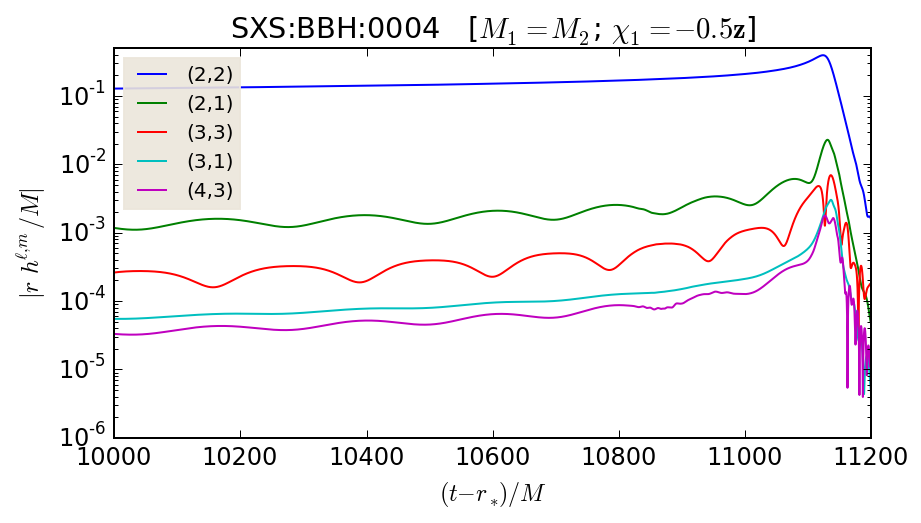

In [24]:
w = waveforms.SpEC.read_from_h5(directory + 'rhOverM_Asymptotic_GeometricUnits.h5/OutermostExtraction.dir')
fig = plt.figure(figsize = (6,3.5))
for i_lm in indices:
    plt.semilogy(w.t, w.abs[:,i_lm], label=r"({0},{1})".format(*w.LM[i_lm]))
plt.xlabel(r"$(t-r_\ast)/M$")
plt.ylabel(r"$| r\, h^{\ell,m} / M |$")
plt.title(r"SXS:BBH:0004   [$M_1 = M_2$; $\mathbf{\chi}_1 = -0.5 \mathbf{z}$]")
plt.xlim(0.0, 11500)
plt.ylim(1e-6, 0.5)
legend = plt.legend(loc="upper left", prop={'size':10}, framealpha=0.9)
legend_frame = legend.get_frame()
legend_frame.set_color('#ECE6DB')
plt.tight_layout(pad=0.1)
plt.savefig('OriginalWaveform.pdf', transparent=True);
! pdfcrop OriginalWaveform.pdf OriginalWaveform.pdf
#plt.show()
plt.xlim(10000.0, 11200)
plt.savefig('OriginalWaveform_Zoomed.pdf', transparent=True);
! pdfcrop OriginalWaveform_Zoomed.pdf OriginalWaveform_Zoomed.pdf
plt.show()

In [48]:
t, CoM = waveforms.SpEC.com_motion(directory+'Horizons.h5')
x_0, v_0, t_0 = waveforms.SpEC.estimate_avg_com_motion(directory+'Horizons.h5')
offset = (x_0 + np.outer(t, v_0))

Optimal x_0: [-0.009148512633219676, 0.007805991613215365, -4.035633351434781e-09]
Optimal v_0: [9.383726333458647e-06, -5.30182283777258e-06, 2.645692680506991e-12]


PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `OriginalCoM.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `TransformedCoM.pdf'.


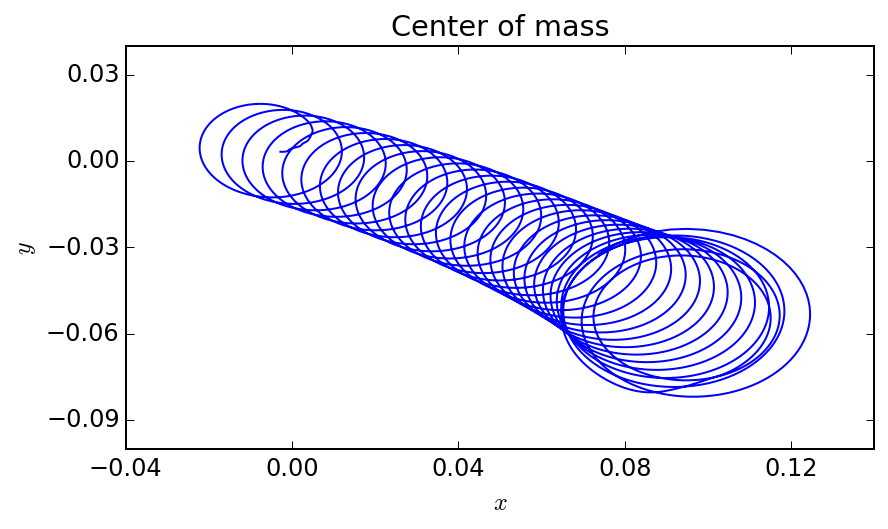

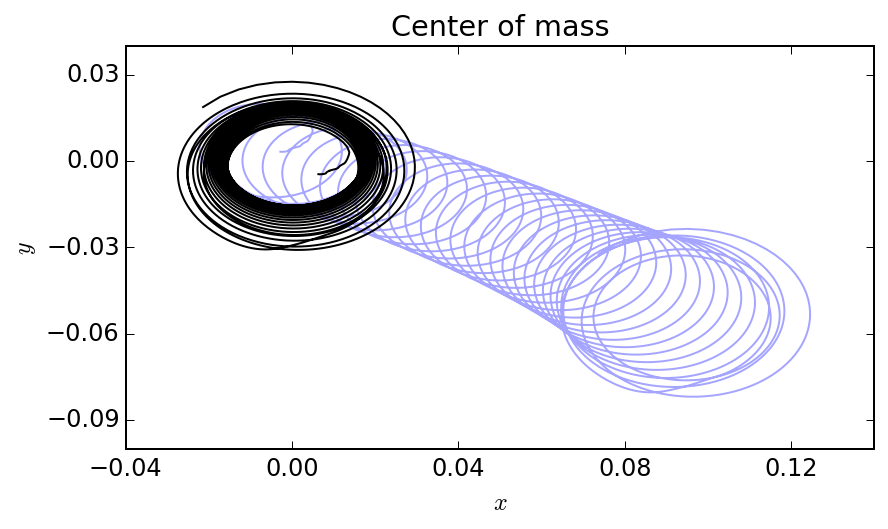

In [57]:
fig = plt.figure(figsize = (6,3.5))
plt.plot(CoM[:,0], CoM[:,1], alpha=1.)
plt.plot(CoM[:,0]-offset[:,0], CoM[:,1]-offset[:,1], alpha=0.0)
plt.yticks(np.arange(-0.09, 0.04, 0.03))
plt.xticks(np.arange(-0.04, 0.14, 0.04))
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"Center of mass")
plt.tight_layout(pad=0.1)
plt.savefig('OriginalCoM.pdf', transparent=True);
! pdfcrop OriginalCoM.pdf OriginalCoM.pdf

fig = plt.figure(figsize = (6,3.5))
plt.plot(CoM[:,0], CoM[:,1], alpha=0.35)
plt.plot(CoM[:,0]-offset[:,0], CoM[:,1]-offset[:,1], color='black')
plt.yticks(np.arange(-0.09, 0.04, 0.03))
plt.xticks(np.arange(-0.04, 0.14, 0.04))
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"Center of mass")
plt.tight_layout(pad=0.1)
plt.savefig('TransformedCoM.pdf', transparent=True);
! pdfcrop TransformedCoM.pdf TransformedCoM.pdf

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `TransformedWaveform.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `TransformedWaveform_Zoomed.pdf'.


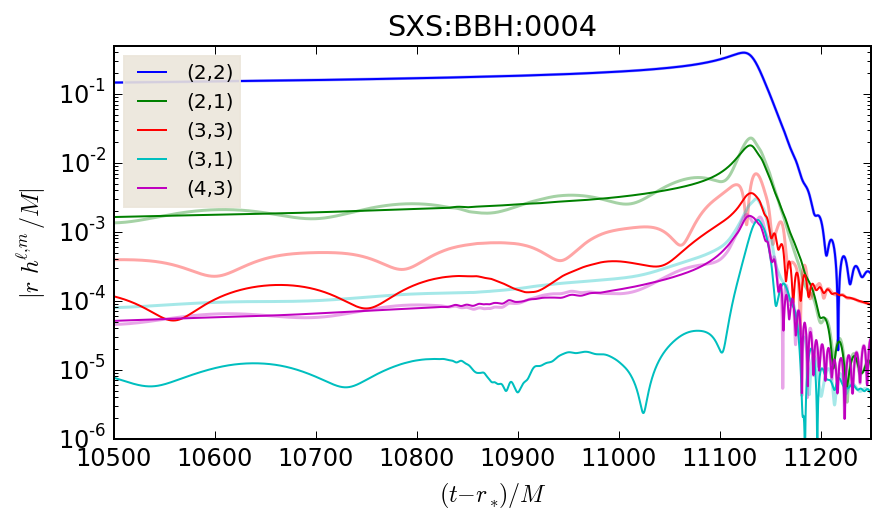

In [26]:
w2 = waveforms.SpEC.read_from_h5(directory + 'rhOverM_Asymptotic_GeometricUnits_CoM.h5/OutermostExtraction.dir')
fig = plt.figure(figsize = (6,3.5))
lines = plt.semilogy(w.t, abs(w.data[:, indices]), alpha=0.35, lw=1.5)
for i_lm, line in zip(indices, lines):
    plt.semilogy(w2.t, w2.abs[:,i_lm], color=plt.getp(line, 'color'), label=r"({0},{1})".format(*w2.LM[i_lm]))
plt.xlabel(r"$(t-r_\ast)/M$")
plt.ylabel(r"$| r\, h^{\ell,m} / M |$")
plt.title(r"SXS:BBH:0004")
plt.xlim(0.0, 11500)
plt.ylim(1e-6, 0.5)
legend = plt.legend(loc="upper left", prop={'size':10}, framealpha=0.9)
legend_frame = legend.get_frame()
legend_frame.set_color('#ECE6DB')
plt.tight_layout(pad=0.1)
plt.savefig('TransformedWaveform.pdf', transparent=True);
! pdfcrop TransformedWaveform.pdf TransformedWaveform.pdf
#plt.show()
plt.xlim(10500.0, 11250)
plt.savefig('TransformedWaveform_Zoomed.pdf', transparent=True);
! pdfcrop TransformedWaveform_Zoomed.pdf TransformedWaveform_Zoomed.pdf
plt.show()

# Center-of-mass histograms

Logarithmic horizontal axis showing values of

  * Offsets
  * Velocities
  * Displacement at merger

In [319]:
directory = '/Users/boyle/Research/Data/SimulationAnnex/'

In [332]:
BMSTransformations = pd.read_csv(directory+'BMSTransformations.csv')
BMSTransformations = BMSTransformations.groupby('dirname').apply(lambda x: x[x['Lev']==x['Lev'].max()]).reset_index(drop=True)

In [366]:
def d_calc(args):
    x0, y0, z0, vx0, vy0, vz0, tf = args
    d = np.array([x0, y0, z0]) + np.array([vx0, vy0, vz0])*tf
    return np.sqrt(d.dot(d))

x0_norms = BMSTransformations[["x0", "y0", "z0"]].apply(lambda x: np.sqrt(x.dot(x)), axis=1)
v0_norms = BMSTransformations[["vx0", "vy0", "vz0"]].apply(lambda x: np.sqrt(x.dot(x)), axis=1)
d_norms = BMSTransformations[["x0", "y0", "z0", "vx0", "vy0", "vz0", "tf"]].apply(d_calc, axis=1)

n_bins = 25

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `InitialDisplacement.pdf'.


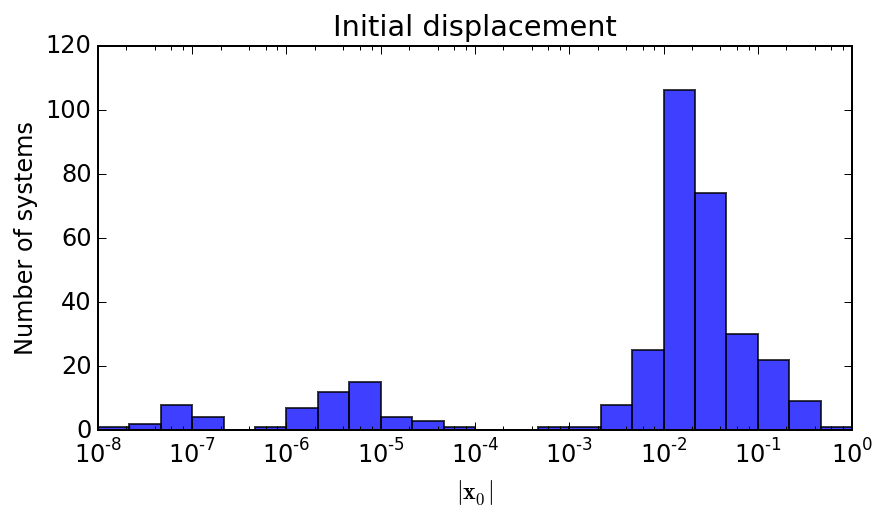

In [410]:
fig = plt.figure(figsize = (6,3.5))
bins = np.logspace(-8.0, 0.0, n_bins)
plt.hist(np.clip(x0_norms,bins[0], bins[-1]), bins=bins, facecolor="blue", alpha=0.75)
plt.gca().set_xscale("log")
plt.xlabel(r"$| \mathbf{x}_0 |$")
plt.ylabel(r"Number of systems")
plt.gca().get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '{:.0f}'.format(int(x))))
plt.title(r"Initial displacement")
plt.tight_layout(pad=0.1)
plt.savefig('InitialDisplacement.pdf', transparent=True);
! pdfcrop InitialDisplacement.pdf InitialDisplacement.pdf
plt.show();

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `DriftVelocity.pdf'.


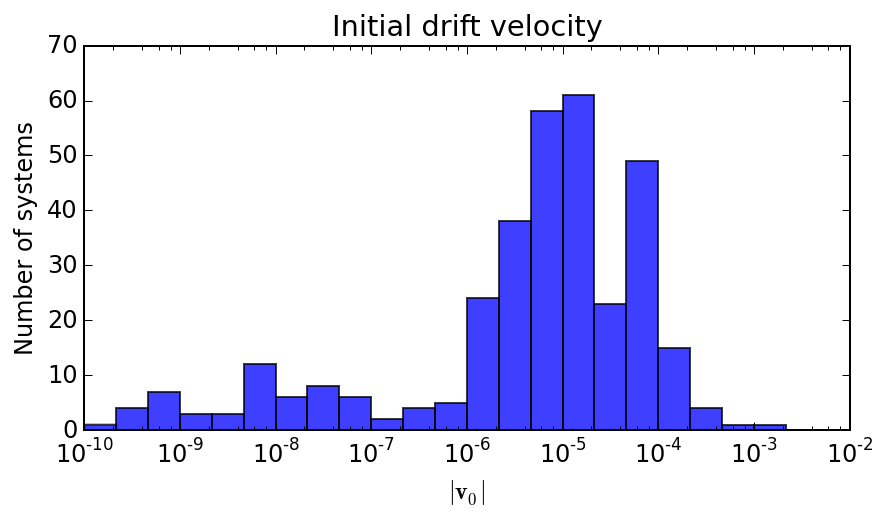

In [413]:
fig = plt.figure(figsize = (6,3.5))
n, bins, patches = plt.hist(v0_norms, bins=np.logspace(-10.0, -2.0, n_bins), facecolor="blue", alpha=0.75)
plt.gca().set_xscale("log")
plt.xlabel(r"$| \mathbf{v}_0 |$")
plt.ylabel(r"Number of systems")
plt.gca().get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '{:.0f}'.format(int(x))))
plt.title(r"Initial drift velocity")
plt.tight_layout(pad=0.1)
plt.savefig('DriftVelocity.pdf', transparent=True);
! pdfcrop DriftVelocity.pdf DriftVelocity.pdf
plt.show();

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `MaxDisplacement.pdf'.


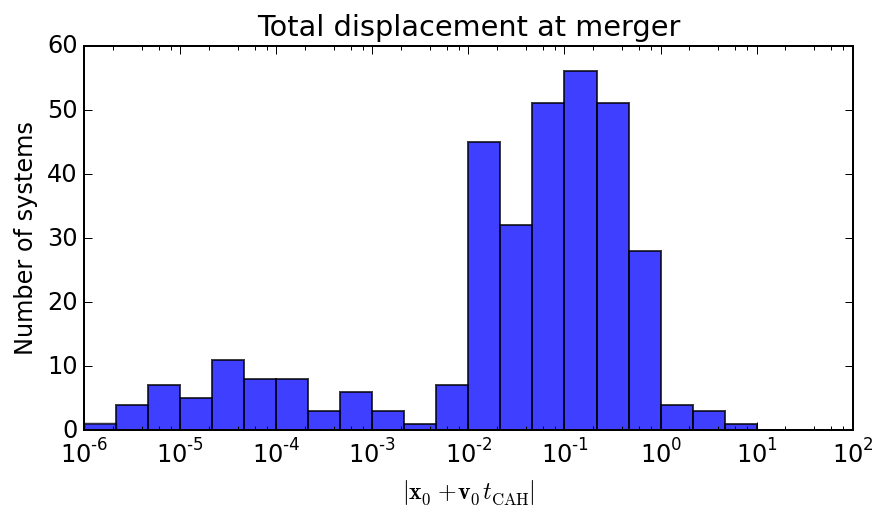

In [414]:
fig = plt.figure(figsize = (6,3.5))
n, bins, patches = plt.hist(d_norms, bins=np.logspace(-6.0, 2.0, n_bins), facecolor="blue", alpha=0.75)
plt.gca().set_xscale("log")
plt.xlabel(r"$| \mathbf{x}_0 + \mathbf{v}_0 t_{\mathrm{CAH}} |$")
plt.ylabel(r"Number of systems")
plt.gca().get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: '{:.0f}'.format(int(x))))
plt.title(r"Total displacement at merger")
plt.tight_layout(pad=0.1)
plt.savefig('MaxDisplacement.pdf', transparent=True);
! pdfcrop MaxDisplacement.pdf MaxDisplacement.pdf
plt.show();

# Boosted grid

In [145]:
β = 0.5
α = math.atanh(β)
γ = 1 / math.sqrt(1-β**2)
v = np.array([1, 0, 1])
vhat = v / np.linalg.norm(v)

def Θ(Θp):
    return 2 * math.atan(γ * (1-β) * math.tan(Θp/2))

def R_B(θp, ϕp):
    R = quaternion.from_spherical_coords(θp, ϕp)
    r = (R * quaternion.z * R.inverse()).vec
    Θp = math.acos(np.dot(r, vhat))
    a = -np.cross(r, vhat)
    tmp = np.linalg.norm(a)
    if tmp < 1e-12:
        return quaternion.one
    a = a / tmp
    return ((Θ(Θp) - Θp) * np.quaternion(0, *a) / 2).exp()

n_phi = 17
n_theta = 17
thetaprm_phiprm = np.array([[thetaprm, phiprm]
                             for phiprm in np.linspace(0.0, 2*np.pi, num=n_phi, endpoint=False)
                            for thetaprm in np.linspace(0.0, np.pi, num=n_theta, endpoint=True)])

R_prm = np.array([quaternion.from_spherical_coords(*tp) for tp in thetaprm_phiprm])
r_prm = np.array([(r * quaternion.z * r.inverse()).vec for r in R_prm])
t_prm = np.array([(r * quaternion.x * r.inverse()).vec for r in R_prm])
p_prm = np.array([(r * quaternion.y * r.inverse()).vec for r in R_prm])

R = np.array([R_B(*tp)*quaternion.from_spherical_coords(*tp) for tp in thetaprm_phiprm])
r = np.array([(r * quaternion.z * r.inverse()).vec for r in R])
t = np.array([(r * quaternion.x * r.inverse()).vec for r in R])
p = np.array([(r * quaternion.y * r.inverse()).vec for r in R])

Rr = np.array([np.quaternion(0, 0.1, 0.2, 0.3).exp()*quaternion.from_spherical_coords(*tp) for tp in thetaprm_phiprm])
rr = np.array([(r * quaternion.z * r.inverse()).vec for r in Rr])
tr = np.array([(r * quaternion.x * r.inverse()).vec for r in Rr])
pr = np.array([(r * quaternion.y * r.inverse()).vec for r in Rr])

phase_differences = np.array([math.acos(np.dot([-math.sin(math.atan2(ri[1], ri[0])), math.cos(math.atan2(ri[1], ri[0])), 0], ti))
                              for ri,ti in zip(r,t)])
phase_differencesr = np.array([math.acos(np.dot([-math.sin(math.atan2(ri[1], ri[0])), math.cos(math.atan2(ri[1], ri[0])), 0], ti))
                               for ri,ti in zip(rr,tr)])

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `OriginalGrid.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `DeboostedGrid.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `DerotatedGrid.pdf'.


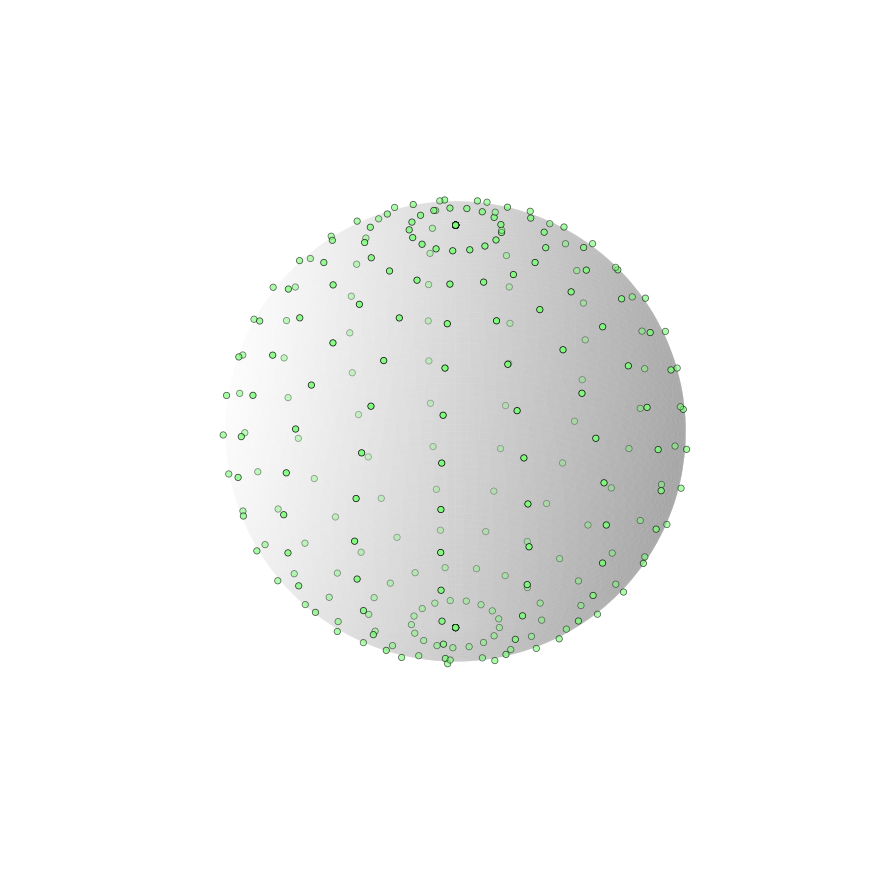

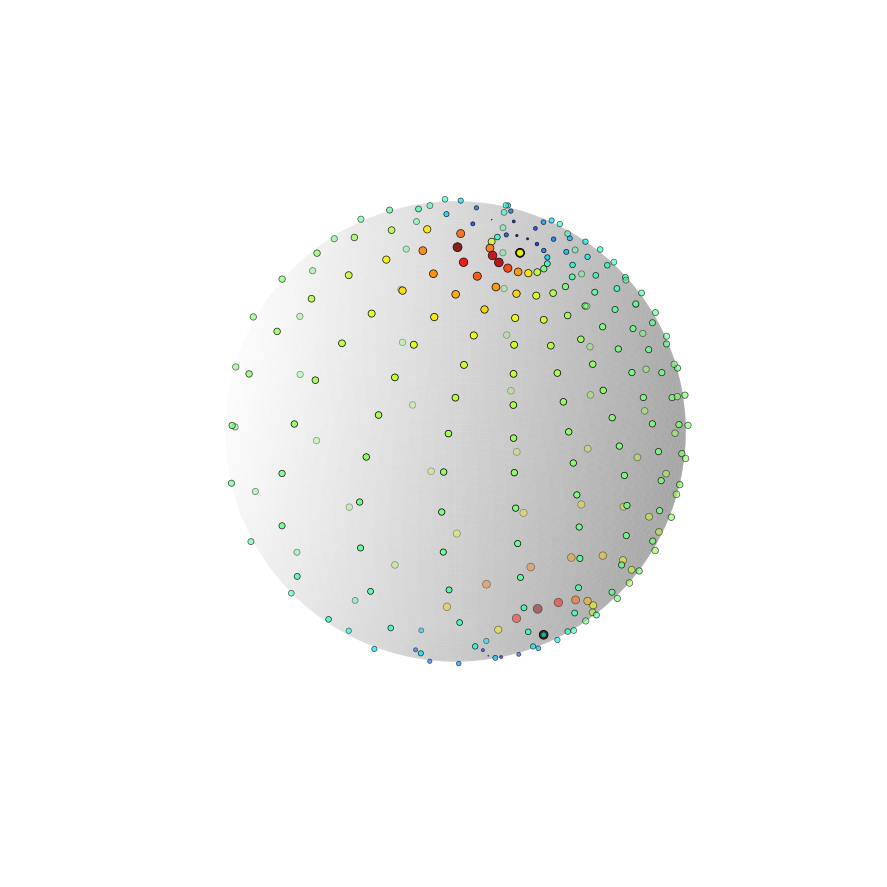

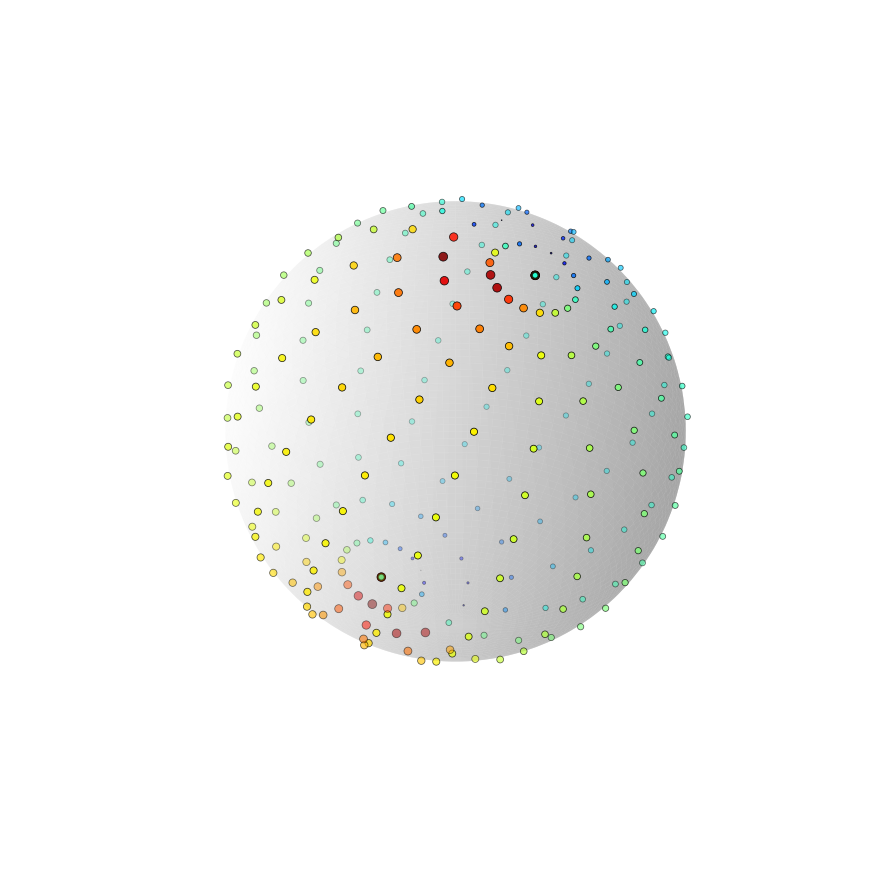

In [426]:
rm=0.99
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)
xm = rm * np.outer(np.cos(phi), np.sin(theta))
ym = rm * np.outer(np.sin(phi), np.sin(theta))
zm = rm * np.outer(np.ones(np.size(phi)), np.cos(theta))

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xm, ym, zm, rstride=1, cstride=1, linewidth=0, color=(1, 1, 1, 0.5));
ax.scatter(r_prm[:,0],r_prm[:,1],r_prm[:,2], c=mpl.cm.jet(0.5), s=10, linewidths=0.375);
# ax.plot_wireframe(r_prm[:,0],r_prm[:,1],r_prm[:,2]);
#ax.set_title('Grid as seen in boosted frame');
ax.set_xlim(-1,1);
ax.set_ylim(-1,1);
ax.set_zlim(-1,1);
ax._axis3don = False;
plt.tight_layout(pad=0.1);
plt.savefig('OriginalGrid.pdf', transparent=True);
! pdfcrop OriginalGrid.pdf OriginalGrid.pdf
# Now show that grid "de-boosted" into the original frame
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xm, ym, zm, rstride=1, cstride=1, linewidth=0, color=(1, 1, 1, 0.5));
ax.scatter(r[:,0],r[:,1],r[:,2], c=phase_differences, s=20*phase_differences/math.pi, linewidths=0.375);
# ax.plot_wireframe(r[:,0],r[:,1],r[:,2]);
#ax.set_title('Grid in original frame that will become equi-angular in boosted frame');
ax.set_xlim(-1,1);
ax.set_ylim(-1,1);
ax.set_zlim(-1,1);
ax._axis3don = False;
plt.tight_layout(pad=0.1);
plt.savefig('DeboostedGrid.pdf', transparent=True);
! pdfcrop DeboostedGrid.pdf DeboostedGrid.pdf

# Now show that grid "de-rotated" into the original frame
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xm, ym, zm, rstride=1, cstride=1, linewidth=0, color=(1, 1, 1, 0.5));
ax.scatter(rr[:,0],rr[:,1],rr[:,2], c=phase_differencesr, s=20*phase_differencesr/math.pi, linewidths=0.375);
# ax.plot_wireframe(r[:,0],r[:,1],r[:,2]);
#ax.set_title('Grid in original frame that will become equi-angular in boosted frame');
ax.set_xlim(-1,1);
ax.set_ylim(-1,1);
ax.set_zlim(-1,1);
ax._axis3don = False;
plt.tight_layout(pad=0.1);
plt.savefig('DerotatedGrid.pdf', transparent=True);
! pdfcrop DerotatedGrid.pdf DerotatedGrid.pdf

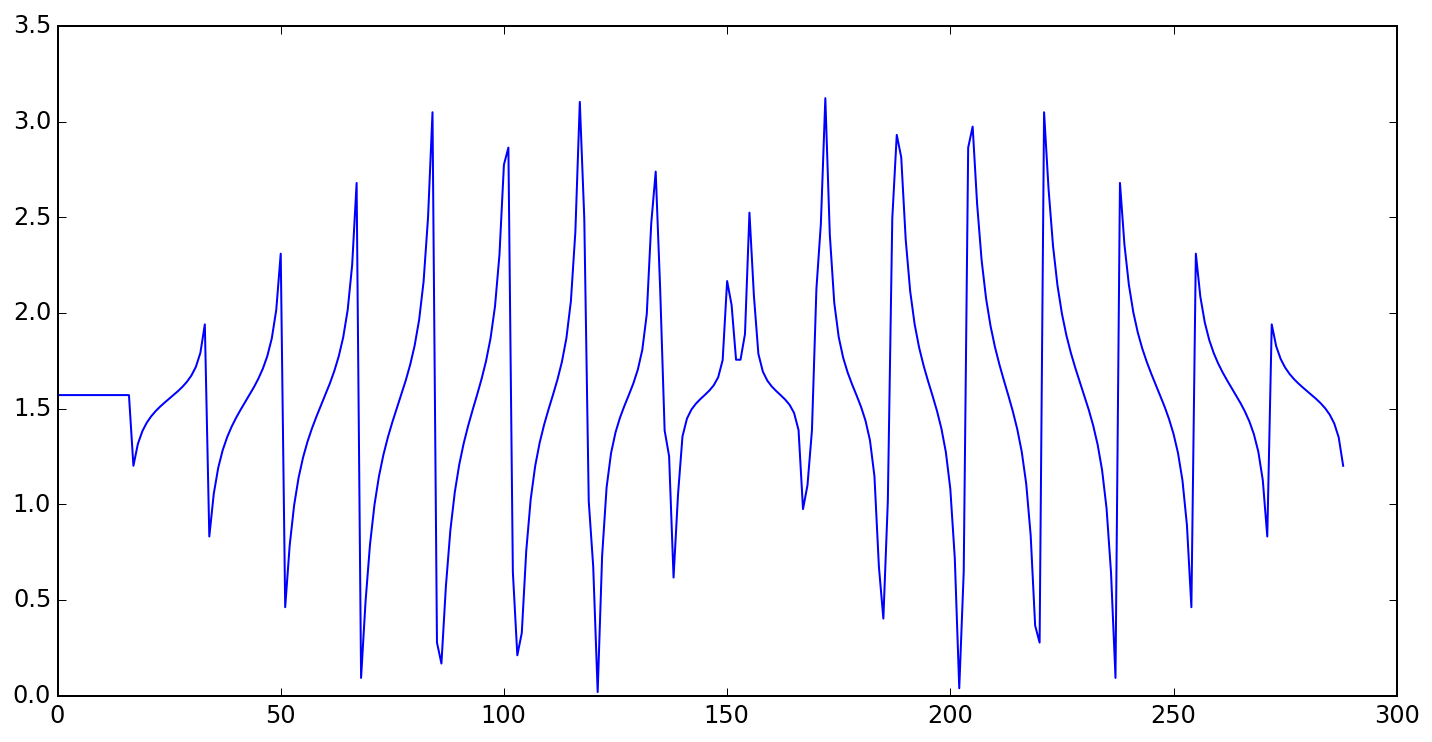

In [148]:
plt.plot(phase_differences)